### Import all the packages

In [100]:
import pandas as pd
import nltk
import numpy as np
from numpy import random as npr
import time
import string
import sklearn
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# from itertools import chain, imap

In [2]:
# download stopwords and punctuations 
nltk.download('punkt') 
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/noarapoport/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noarapoport/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
# from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

2023-04-11 16:29:47.166018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import re
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from operator import itemgetter

### Data Processing

In [5]:
#Read in data
df1 = pd.read_json('/Users/noarapoport/Documents/GitHub/final_50k_221118.json',lines=True)

In [6]:
df1.head()

,awesome_biz_id,business_name,state,city,zip,content,posted_date,stars,webpage_url,menu_url,customer_rating_index,visibility_index,open_hours_raw,business_characteristics,is_entertainment,is_traffic
0,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,COVID-19 DELIVERY I caved. I'm not a fan of fo...,2020-07-29,4.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
1,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,4.5 stars I'm in carb heaven! Trattoria Bruno ...,2020-08-07,5.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
2,biz_000001,Remixed By Burnout,CA,Riverside,92506.0,Small Business Saturday and I went in to check...,2021-12-05,5.0,None,None,NaN,3.19,"{'friday': [{'closedHours': '1800', 'openHours...","[""Used Goods"",""Wheelchair Accessible"",""Accepts...",False,True
3,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True
4,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True


In [73]:
df_shuffled = df1.sample(frac=1, random_state=39)

# Reset the index
df_shuffled = df_shuffled.reset_index(drop=True)

df2 = df_shuffled[0:30000]
#print(df2)
#Select first 50000 rows

#past = time.time()
df3 = df2.groupby(df2["awesome_biz_id"],as_index=False).agg({"content":' '.join,"business_name":"first","is_entertainment":"first","is_traffic":"first"})
#now = time.time()
#print(now-past)
#print(df_new["business_name"])
print("df3",df3)

df3       awesome_biz_id                                            content  \
0         biz_000003  They do not make authentic Italian calzones. O...   
1         biz_000005  They are scammers!!! DO NOT BUY PRODUCTS FROM ...   
2         biz_000009  Just opened the paper bag to find a burnt croi...   
3         biz_000014  Needed a quick car wash!!! In the sign $4.19 i...   
4         biz_000020  This service is convenient, easy, and fast. Li...   
...              ...                                                ...   
18719     biz_049988  Vonsland! I swear, THIS IS ACTUALLY A SMALL TO...   
18720     biz_049993  This is a fun place to relax, create a paintin...   
18721     biz_049994  3 stars for food and service. I have a friend ...   
18722     biz_049995  It's wasn't bad as all. It's very slow and eve...   
18723     biz_049999  Great selection.. lots of high end options.. b...   

                    business_name  is_entertainment  is_traffic  
0                         Cal

In [101]:
#Select first 50000 rows
# first10 = df1


df_shuffled = df1.sample(frac=1, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)

#Extract business name and content from the first 50000 rows
df2 = df_shuffled[["business_name","content"]]

# Create a seperate data frame for label

label = ["is_entertainment","is_traffic"]
labeldf = df3[["is_entertainment","is_traffic"]]
print(labeldf)
df4 = df3[["business_name","content"]]
print(df4)
#Extract business name and content
begin = time.time()
#print(df2)

       is_entertainment  is_traffic
0                 False        True
1                  True        True
2                 False        True
3                 False        True
4                 False        True
...                 ...         ...
18719             False       False
18720             False       False
18721             False       False
18722              True       False
18723              True       False

[18724 rows x 2 columns]
                    business_name  \
0                         Calzone   
1               cheebapotshop.com   
2                 Perk Coffee Bar   
3                 MB KAZMO OIL CO   
4                  Wash-N-Deliver   
...                           ...   
18719         Lucky Liquor Market   
18720             Pinot's Palette   
18721                    Diem Hen   
18722        Empire Hookah Lounge   
18723  Minute Shops Liquor & Deli   

                                                 content  
0      They do not make authentic Ital

In [75]:
token = []
name = ["business_name","content"]
dic1 = {}
WORD = re.compile(r'\w+')

In [76]:
WORD

re.compile(r'\w+', re.UNICODE)

### Tokenize Data

In [77]:
def regTokenize(text):
    words = WORD.findall(text)
    return words

In [78]:

for i in [0,1]:
    arrx = []
    for j in range(0,len(df4[name[i]])):
    #for j in range(0,len(df2[name[i]])):
        listx = regTokenize(df4[name[i]][j])
        arrx.append(listx)
    dic1[name[i]] = arrx
# print(dic1)
# dic1 contains all the tokens of business name and contents
#dic1 contains all the tokens of business name and contents
end = time.time()
print("tokenization",end-begin)
now = end

tokenization 7.525721073150635


### Stop words

In [79]:
stop_words = set(stopwords.words("english"))
for i in range(len(string.punctuation)):    
    stop_words.add(string.punctuation[i])
stop_words.add("'s")
stop_words.add(".....")
print(stop_words)

{'above', '=', 'weren', 'ma', 'the', 'hadn', 'wouldn', '&', '_', 'should', 'from', 'which', 'o', 'their', 'to', 'such', 'own', "don't", 'theirs', 'in', 'she', 'each', "isn't", "mightn't", 'when', "you'd", ')', 'haven', '~', 'too', '`', 'mightn', '#', ']', 'ourselves', 'those', 'while', 'where', 'between', 'more', '$', 'once', "you'll", 'it', 'yours', '"', 'a', 'during', 'shouldn', 'yourself', 'am', 'our', '{', 're', "mustn't", 'don', 'mustn', 'both', 'but', 'until', 'my', "you've", 'are', 'up', 'other', 'm', '[', 'did', 'about', "couldn't", 'and', 'can', 'down', 'ours', 'he', 'themselves', 'few', 't', 'on', "it's", 'no', 'y', 'doing', 'against', '-', '<', "wasn't", "haven't", 'than', 'into', 'this', 'is', "she's", 'myself', 'further', 'why', ',', "'s", 'being', '?', ':', 'these', 'there', 'out', 'that', 'didn', '%', 'we', "hasn't", '\\', 'whom', '/', 'couldn', 'him', 's', "weren't", 'through', 'here', "doesn't", 'you', 'won', 'himself', "shan't", ';', '|', 'after', "'", 'some', 'so', "

### Word Stemmer

In [80]:
stemmer = PorterStemmer()
# print(dic1)
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic1[name[i]])):
        flist = []
        for z in dic1[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(' '.join(flist))
    dic1[name[i]] = arrc
    #print(len(dic1[name[i]]))
    
# print(dic1)

In [94]:
from sklearn.decomposition import NMF

tf_idf_model  = TfidfVectorizer(min_df=0.001)
#print(tf_idf_model.get_feature_names_out())
bustf = dic1["business_name"]
tf_idf_vector1 = tf_idf_model.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
contf = dic1["content"]
tf_idf_vector2 = tf_idf_model.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
X = np.hstack((tf_idf_array1,tf_idf_array2))

In [108]:
def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

is_entertainment
(14979, 3652) (14979,)


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


is_traffic
(14979, 3652) (14979,)


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


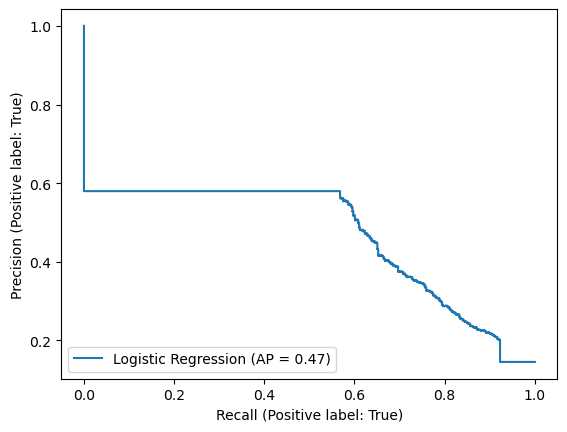

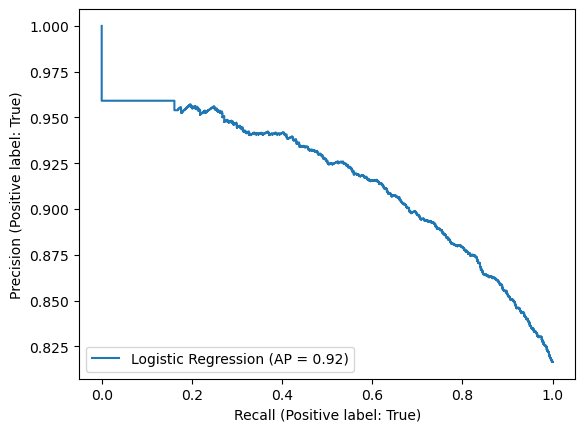

In [115]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    lr = LogisticRegression(max_iter=10000, penalty='none')
    lr.fit(X_train, y_train)
    y_test_probs = lr.predict_proba(X_test)[:,1]

    # Containers for true positive / false positive rates
    precision_scores = []
    recall_scores = []

    # Define probability thresholds to use, between 0 and 1
    probability_thresholds = np.linspace(0, 1, num=100)

    # Find true positive / false positive rate for each threshold
    for p in probability_thresholds:

        y_test_preds = []

        for prob in y_test_probs:
            if prob > p:
                y_test_preds.append(1)
            else:
                y_test_preds.append(0)

        precision, recall = calc_precision_recall(y_test, y_test_preds)

        precision_scores.append(precision)
        recall_scores.append(recall)
    plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')

is_entertainment


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


is_traffic


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


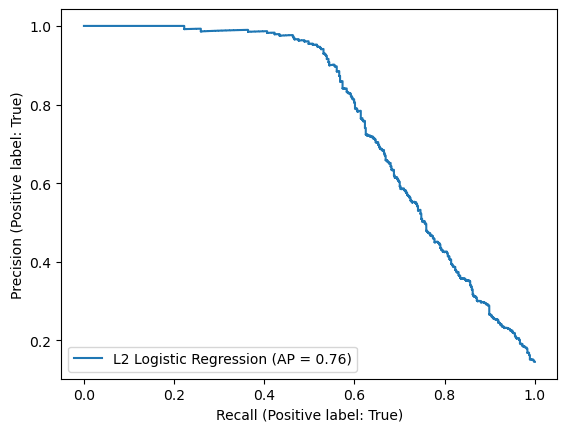

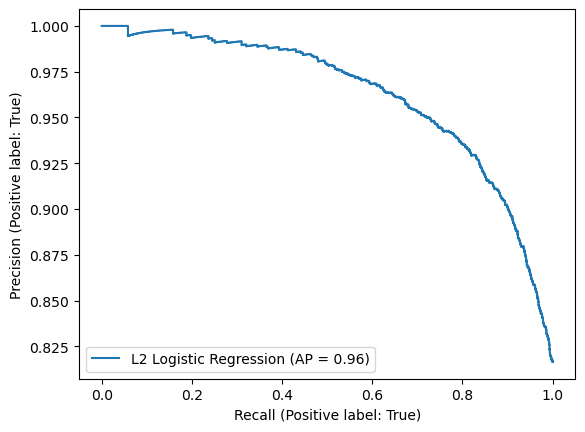

In [114]:
# LOGISTIC REGRESSION (REGULARIZATION)

# Fit and predict test class probabilities
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
    lr_l2.fit(X_train, y_train)
    y_test_probs = lr_l2.predict_proba(X_test)[:,1]

    # Containers for true positive / false positive rates
    l2_precision_scores = []
    l2_recall_scores = []

    # Define probability thresholds to use, between 0 and 1
    probability_thresholds = np.linspace(0,1,num=100)

    # Find true positive / false positive rate for each threshold
    for p in probability_thresholds:

        y_test_preds = []

        for prob in y_test_probs:
            if prob > p:
                y_test_preds.append(1)
            else:
                y_test_preds.append(0)

        precision, recall = calc_precision_recall(y_test, y_test_preds)

        l2_precision_scores.append(precision)
        l2_recall_scores.append(recall)
    plot_precision_recall_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');

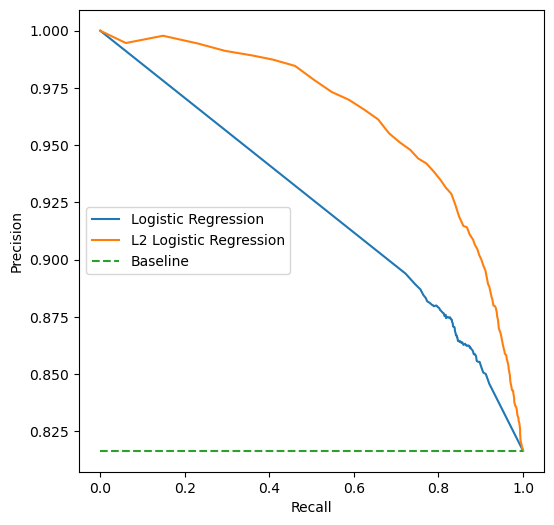

In [111]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


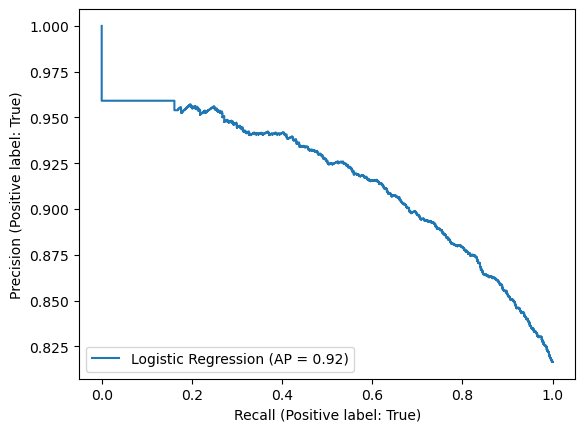

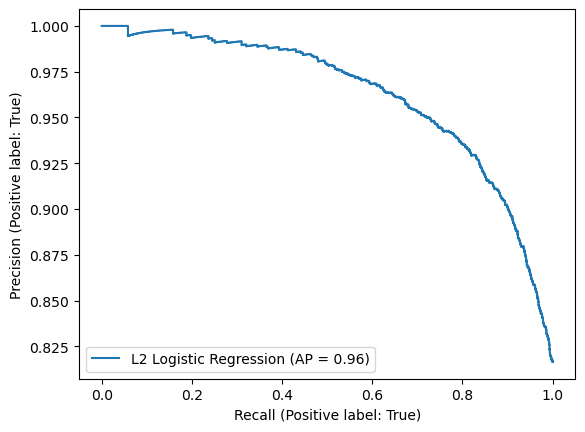

In [112]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');

       0     1     2     3     4     5     6     7     8     9     ...  3642  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18719   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18720   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18721   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18722   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18723   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3643  3644  3645      3646  3647

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.87
[[2937  264]
 [ 222  322]] : is the confusion matrix
0.5494880546075085 : is the precision score
0.5919117647058824 : is the recall score
0.5699115044247788 : is the f1 score
is_traffic


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(14979, 3652) (14979,)


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.77
[[ 291  396]
 [ 472 2586]] : is the confusion matrix
0.8672032193158954 : is the precision score
0.8456507521255723 : is the recall score
0.8562913907284768 : is the f1 score


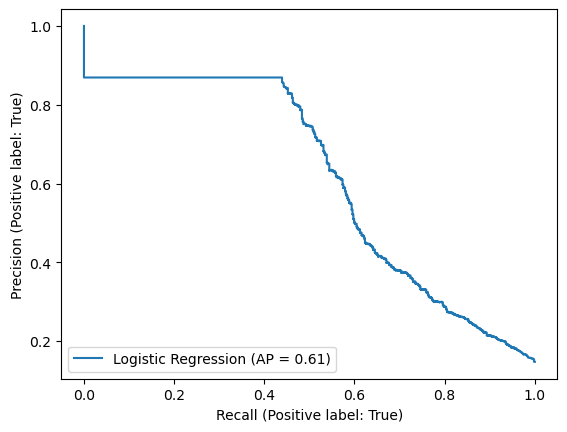

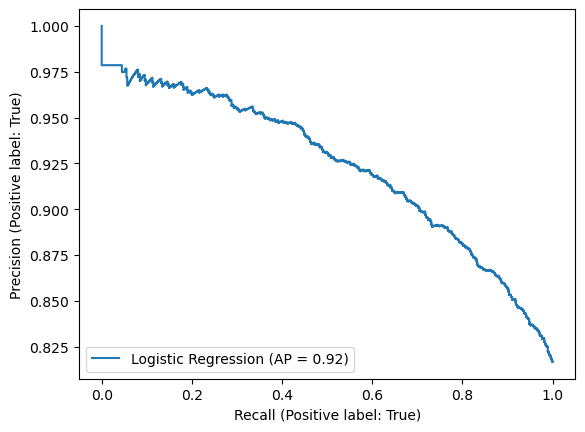

In [104]:
X= pd.DataFrame(X)
print(X)

# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    logreg = LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs', max_iter=400)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")
    '''
    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = logreg.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, predictions)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    '''
# precision/recall curves
    #calculate precision and recall
    from sklearn.metrics import plot_precision_recall_curve
    plot_precision_recall_curve(logreg, X_test, y_test, name = 'Logistic Regression')

In [57]:
## SVD
svd_modeling= TruncatedSVD(n_components=1588)# , algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(X)
doc_topic_matrix_svd = svd_modeling.transform(X)
topic_term_matrix_svd =svd_modeling.components_
# vocab = vectorizer.get_feature_names()

In [82]:
num_top_terms = 10
feature_names = tf_idf_model.get_feature_names_out()

svd_modeling= TruncatedSVD(n_components=1588)#, algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(X)
components=svd_modeling.components_

vocab = tf_idf_model.get_feature_names_out()

topic_word_list = []
def get_topics(components): 
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
    # print(topic_word_list)
    return topic_word_list
'''
for topic_idx, topic in enumerate(topic_term_matrix_svd):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
    print()
# Create a dataframe from the document-topic matrix
dfsvd = pd.DataFrame(doc_topic_matrix_svd)

# Add a column for the original text data
#df["Text"] = bustf + contf

# Print the resulting dataframe
print(dfsvd)
'''

'\nfor topic_idx, topic in enumerate(topic_term_matrix_svd):\n    print("Topic #%d:" % topic_idx)\n    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))\n    print()\n# Create a dataframe from the document-topic matrix\ndfsvd = pd.DataFrame(doc_topic_matrix_svd)\n\n# Add a column for the original text data\n#df["Text"] = bustf + contf\n\n# Print the resulting dataframe\nprint(dfsvd)\n'

In [83]:
get_topics(components)

['  apologet approxim leg advertis thick latest secur',
 '  apologet approxim papa becom voicemail contain aisl',
 '  advertis apologet blvd hall voicemail papa suit',
 '  55 accord author say karen apologet flag',
 '  55 karen approxim versu smart base dri',
 '  approxim pill introduc anyth bakersfield 14 30am',
 '  approxim basic bathroom accord 55 author advertis',
 '  base 1000 karen versu smart differ 00',
 '  14 bakersfield base also anyth accord basic',
 '  30am base avail introduc anyth section accord',
 '  anyth bakersfield behind avail laugh research wit',
 '  1000 anyth 30am bakersfield accord introduc basic',
 '  bakersfield avail section accord introduc stomach af',
 '  avail section accord 14 anyth also 1000',
 '  author avail section 1000 say 14 30am',
 '  aisl april behind advantag introduc becom wit',
 '  airport behind reput intent basic also anxieti',
 '  800 behind advantag also effici wit grab',
 '  airport laugh research intent advantag 800 punctual',
 '  behind a

In [84]:
doc_topic_matrix_svd = svd_modeling.transform(X)

In [88]:
dfsvd = pd.DataFrame(doc_topic_matrix_svd)
print(dfsvd)

           0         1         2         3         4         5         6     \
0      0.048861 -0.018360 -0.014132 -0.000108 -0.000882  0.008535 -0.028077   
1      0.161118 -0.067729 -0.031718  0.030177 -0.021089 -0.003499 -0.032598   
2      0.093483 -0.051481 -0.046734 -0.018378  0.001566  0.022141 -0.133382   
3      0.066285 -0.028772 -0.011562  0.039303  0.041334 -0.004323 -0.003090   
4      0.101192 -0.034478 -0.026346  0.015385  0.000762 -0.001507 -0.020646   
...         ...       ...       ...       ...       ...       ...       ...   
18719  0.297529  0.405517  0.076038 -0.020340  0.028003  0.261328  0.196232   
18720  0.109167 -0.028494 -0.020118  0.003066 -0.002269  0.009487 -0.043060   
18721  0.182464 -0.063838 -0.041496  0.001977 -0.000055  0.017698 -0.083392   
18722  0.173721 -0.069723 -0.045793 -0.000468  0.001224  0.015179 -0.098644   
18723  0.443784  0.328856 -0.026349 -0.228469 -0.013151 -0.310162  0.167331   

           7         8         9     ...      1578 

       0     1     2     3     4     5     6     7     8     9     ...  3642  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18719   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18720   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18721   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18722   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18723   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3643  3644  3645      3646  3647

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.90
[[3052  149]
 [ 225  319]] : is the confusion matrix
0.6816239316239316 : is the precision score
0.5863970588235294 : is the recall score
0.6304347826086957 : is the f1 score
[2167, 7462, 17026, 17466, 17648, 17742, 7660, 12703, 14268, 17118, 10272, 8887, 14339, 11616, 12047, 7854, 9097, 8663, 10034, 8573, 16256, 12122, 15974, 16826, 13587, 10212, 7449, 12479, 5174, 12030, 7004, 1347, 11060, 12911, 15547, 8941, 9489, 322, 18504, 8299, 2298, 4024, 5207, 18246, 10727, 17959, 16900, 16442, 15806, 7270, 14040, 18698, 12283, 16628, 9084, 8552, 18379, 12774, 12673, 18582, 8825, 11055, 14009, 17891, 16614, 13699, 6466, 7988, 247, 4367, 3794, 9954, 2503, 11878, 7200, 9593, 2020, 18035, 16450, 6808, 1632, 3616, 8840, 14727, 13251, 11285, 7636, 9952, 13995, 2315, 17275, 11162, 17455, 15839, 8813, 16732, 17003, 9966, 10312, 12888, 3411, 18162, 17657, 12187, 4832, 2312, 8877, 18311, 119, 12084, 16334, 14760, 11341, 9875, 12593, 2704, 4518, 2450, 14900, 13834, 3570, 4564, 10835, 1516

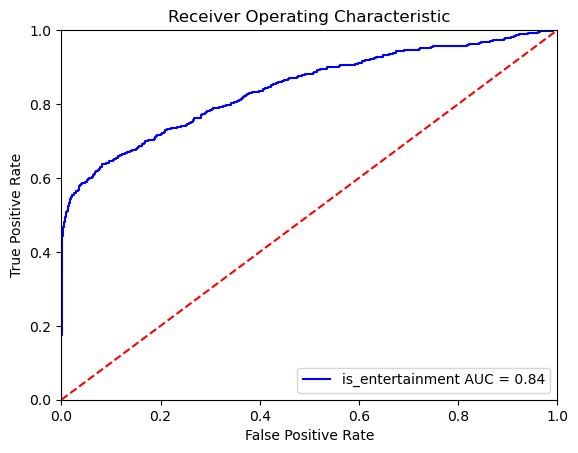

is_traffic
(14979, 1588) (14979,)


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.83
[[ 291  396]
 [ 256 2802]] : is the confusion matrix
0.8761726078799249 : is the precision score
0.9162851536952257 : is the recall score
0.8957800511508951 : is the f1 score
[6467, 2167, 103, 8675, 9022, 17594, 16607, 17191, 17026, 17466, 15666, 16876, 17742, 15765, 17729, 7780, 290, 17961, 15849, 17039, 5568, 9097, 17245, 6885, 8663, 16767, 18338, 10034, 18345, 16256, 3526, 18406, 15974, 13587, 15867, 7449, 7301, 18303, 7004, 8875, 9459, 15652, 11060, 16226, 16425, 5766, 18022, 4219, 15547, 6267, 6706, 15756, 13599, 10864, 18052, 5116, 18196, 16217, 17000, 15764, 17975, 1783, 3686, 16935, 1396, 18256, 5716, 10727, 11967, 17959, 16642, 15949, 16442, 12751, 10894, 10588, 16006, 18121, 15806, 17777, 18411, 14040, 424, 6482, 18698, 3528, 11075, 16628, 17702, 4981, 18509, 16089, 17841, 14436, 14438, 18582, 8825, 17989, 11525, 17705, 15879, 12378, 18332, 11055, 18675, 4352, 18482, 17891, 16614, 5814, 7048, 6535, 16881, 16884, 16059, 17206, 16808, 18550, 15403, 18035, 16450, 

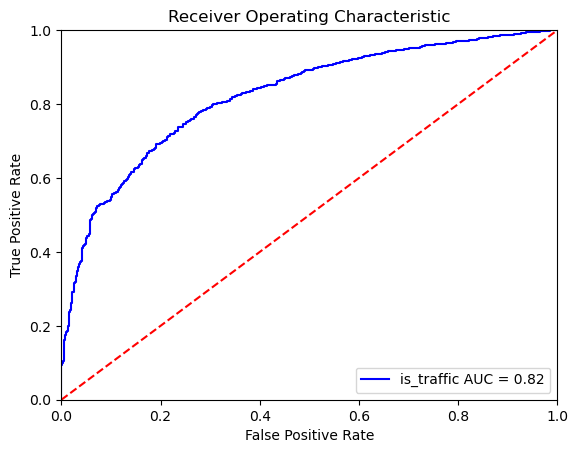

In [89]:
X= pd.DataFrame(X)
print(X)

npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm, metrics
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    logreg = LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs', max_iter=400)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = logreg.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, predictions)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [91]:
## NMF
num_topics = 3
nmf = NMF(n_components=num_topics)
nmf.fit(X)
doc_topic_matrix = nmf.transform(X)
topic_term_matrix = nmf.components_


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [92]:
num_top_terms = 10
feature_names = tf_idf_model.get_feature_names_out()
for topic_idx, topic in enumerate(topic_term_matrix):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
    print()
# Create a dataframe from the document-topic matrix
dfnmf = pd.DataFrame(doc_topic_matrix)

# Add a column for the original text data
#df["Text"] = bustf + contf

# Print the resulting dataframe
print(dfnmf)

Topic #0:
leg basic thick secur latest bathroom introduc approxim 55 accord

Topic #1:
apologet approxim papa voicemail becom aisl contain tequila job sidewalk

Topic #2:
advertis voicemail blvd hall suit first happi land disappoint celebr

              0         1         2
0      0.009330  0.000000  0.000000
1      0.029835  0.000000  0.003246
2      0.019678  0.000000  0.000000
3      0.012299  0.000000  0.001254
4      0.018867  0.000000  0.000134
...         ...       ...       ...
18719  0.006029  0.103820  0.000000
18720  0.019123  0.001555  0.001195
18721  0.033688  0.000000  0.001847
18722  0.033011  0.000000  0.001156
18723  0.037586  0.101769  0.000000

[18724 rows x 3 columns]


is_entertainment
(14979, 3) (14979,)
Accuracy: 0.86
[[3200    1]
 [ 539    5]] : is the confusion matrix
0.8333333333333334 : is the precision score
0.009191176470588236 : is the recall score
0.018181818181818184 : is the f1 score
[2167, 103, 17191, 16960, 17026, 17466, 15666, 17742, 18597, 14268, 17118, 10272, 8887, 7780, 14339, 17013, 4411, 18329, 18159, 11635, 14926, 17007, 5568, 9097, 8663, 10034, 16256, 10663, 16868, 15974, 17968, 17923, 12479, 15391, 12030, 7004, 9459, 1347, 12911, 5766, 18284, 3233, 4219, 15547, 17490, 5116, 4475, 9489, 16217, 15764, 17467, 8299, 2298, 1396, 18246, 10727, 11967, 18722, 12314, 2184, 16442, 10588, 15806, 14040, 17481, 18698, 12283, 16628, 9084, 8552, 15758, 3474, 18379, 12774, 18420, 18582, 9624, 11055, 1087, 13666, 14009, 17891, 16614, 18051, 7048, 18291, 7988, 247, 17947, 16060, 9954, 11878, 15773, 7200, 13286, 18550, 18035, 16450, 6808, 1632, 3616, 18382, 17282, 11285, 9952, 15821, 17275, 878, 1768, 14413, 16613, 17455, 16471, 11032, 6958, 1583

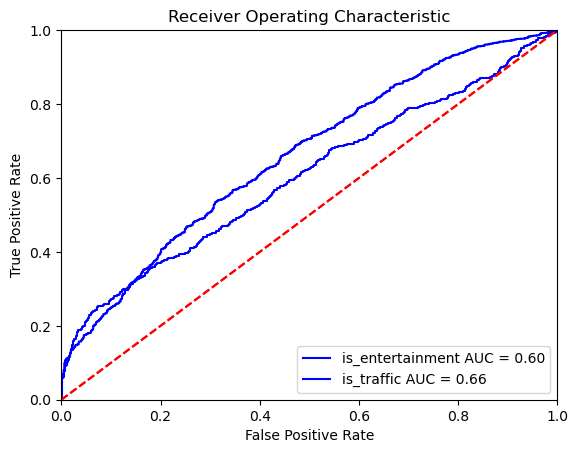

In [93]:


npr.seed(123)

# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfnmf, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    logreg = LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs', max_iter=400)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = logreg.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, predictions)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

       0     1     2     3     4     5     6     7     8     9     ...  3941  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
25308   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25309   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25310   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25311   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25312   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3942  3943  3944      3945  3946

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.87
[[3955  413]
 [ 245  450]] : is the confusion matrix
0.5214368482039398 : is the precision score
0.6474820143884892 : is the recall score
0.5776636713735559 : is the f1 score
[2209, 17389, 23589, 2762, 24981, 13020, 21294, 12371, 1889, 5532, 20276, 16037, 20747, 11771, 20166, 5533, 22852, 1747, 4563, 22499, 19189, 1808, 17169, 14193, 25305, 20675, 17603, 24911, 3383, 21192, 6547, 196, 13268, 10011, 22368, 7809, 24059, 23037, 24207, 21903, 8725, 3455, 15503, 24999, 24832, 8278, 22114, 13474, 22150, 11854, 18866, 17093, 14238, 17752, 14882, 8826, 24808, 18246, 1684, 13712, 9003, 8091, 22609, 25064, 1475, 14727, 1978, 6384, 21670, 8944, 22033, 19030, 22154, 16387, 16426, 8487, 5652, 6237, 21214, 1662, 23042, 24163, 11051, 18175, 15593, 12679, 24424, 21111, 22579, 20442, 20865, 14169, 15190, 21773, 24338, 13005, 18436, 8506, 3053, 18763, 9926, 11044, 2516, 1122, 25124, 6868, 22976, 3396, 22371, 18529, 21823, 22162, 7551, 12341, 14725, 24218, 4449, 13229, 10373, 6876, 19632, 

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.78
[[ 406  525]
 [ 576 3556]] : is the confusion matrix
0.8713550600343053 : is the precision score
0.8606001936108422 : is the recall score
0.8659442347497869 : is the f1 score
[20754, 17389, 6586, 23589, 16533, 2153, 23000, 21228, 3820, 5210, 15947, 23554, 4156, 22678, 23578, 20027, 12371, 24990, 15546, 4618, 8476, 17238, 22544, 20747, 6920, 15448, 23317, 21451, 3329, 10305, 20781, 20166, 21705, 24795, 22852, 24815, 24905, 4563, 21608, 7934, 17169, 22381, 12245, 19177, 2873, 23185, 3426, 13115, 24288, 20675, 19321, 11574, 8870, 24731, 7602, 7007, 196, 18226, 20362, 5706, 13268, 4413, 21006, 22368, 24059, 20787, 23037, 12429, 20855, 23399, 15970, 21903, 626, 2195, 20315, 18111, 14372, 23797, 15503, 24999, 22114, 22150, 6987, 23742, 24248, 23326, 12994, 3547, 12776, 14618, 16059, 397, 20749, 10021, 24455, 15617, 22716, 24727, 22562, 17124, 13595, 13024, 23027, 14882, 21700, 6281, 19690, 11511, 20194, 8818, 17328, 24986, 22609, 25064, 20001, 24634, 25070, 14727, 23373, 4564,

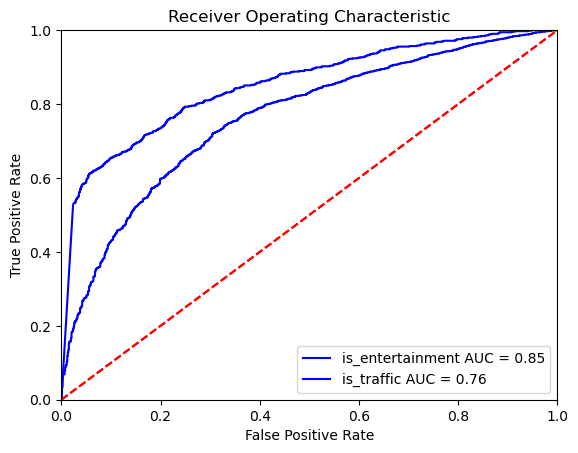

In [27]:
X= pd.DataFrame(X)
print(X)

npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm, metrics
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    logreg = LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs', max_iter=400)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = logreg.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, predictions)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [14]:
'''
tflist = []
for i in [0,1]:
    tr_idf_model  = TfidfVectorizer(min_df=0.001)
    corpus = dic1[name[i]]
    tf_idf_vector = tr_idf_model.fit_transform(corpus)
    tf_idf_array = tf_idf_vector.toarray()
    words_set = tr_idf_model.get_feature_names_out()
    #print(words_set)
    df_tf_idf= pd.DataFrame(tf_idf_array, columns = words_set)
    tflist.append(df_tf_idf)
    #This is the tf-idf result that we can use for SVM or Simple Bayes
    print(df_tf_idf)
    # print(labeldf[label[i]])
    
    
    
    #tfidf = []
    tfidf = [(j,sum(df_tf_idf[j])) for j in words_set]
    tfidf.sort(key=lambda x: x[1],reverse=True)
    print(name[i],tfidf)
    end = time.time()
    print(name[i],end-now)
    now = end
'''

         76  ace  aid  american  ampm  angel  antiqu  applianc  arco  art  \
0       0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
1       0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
2       0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
3       0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
4       0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
...     ...  ...  ...       ...   ...    ...     ...       ...   ...  ...   
487940  0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
487941  0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
487942  0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
487943  0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   
487944  0.0  0.0  0.0       0.0   0.0    0.0     0.0       0.0   0.0  0.0   

        ...  west  wholesal  wild      wine  wineri  wing  world  yelp  \
0

0          True
1          True
2          True
3          True
4          True
          ...  
487940     True
487941    False
487942     True
487943     True
487944     True
Name: is_traffic, Length: 487945, dtype: bool

In [26]:
# Create a PCA model with 2 components: pca
pca = PCA()

# Fit the PCA instance to the scaled samples
pca.fit(tflist[0])

# Transform the scaled samples: pca_features
pca_features_0 = pca.transform(tflist[0])

# Print the shape of pca_features
print(pca_features_0.shape)


(487945, 370)


In [27]:
pca_features_0

array([[-2.60919338e-02, -3.22085435e-02, -2.52374247e-02, ...,
         3.37388816e-04, -1.15609218e-04, -1.39269085e-04],
       [-2.36823287e-02, -2.62860304e-02, -2.07138141e-02, ...,
        -2.03247858e-05, -1.49577439e-05, -1.69849235e-04],
       [-2.95916111e-02, -3.74791497e-02, -3.28774070e-02, ...,
         5.20134832e-06, -9.57242329e-05,  3.30777798e-05],
       ...,
       [-2.35695437e-02, -2.65180738e-02, -2.14388412e-02, ...,
         5.52063301e-05,  1.51032094e-03, -2.28028968e-05],
       [-2.28439225e-02, -2.51996988e-02, -1.96805876e-02, ...,
        -3.00235384e-05,  1.24586777e-04, -6.14028790e-05],
       [-2.28439225e-02, -2.51996988e-02, -1.96805876e-02, ...,
        -3.00235384e-05,  1.24586777e-04, -6.14028790e-05]])

In [ ]:
pca1 = PCA()

# Fit the PCA instance to the scaled samples
pca1.fit(tflist[1])

# Transform the scaled samples: pca_features
pca_features_1 = pca1.transform(tflist[1])

# Print the shape of pca_features
print(pca_features_1.shape)

In [19]:
from sklearn.linear_model import LogisticRegression

In [50]:
npr.seed(123)
for i in [0,1]:
    for j in [0,1]:
        print(name[i],label[j])
        X_train, X_test, y_train, y_test = train_test_split(tflist[i], labeldf[label[j]], test_size=0.2, random_state=434)
        # create and fit the Logistic Regression model
        logreg = LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs', max_iter=400)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
    
        # calculate accuracy
        #accuracy = (y_pred == y_test).sum() / len(y_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')

        print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")

        print(precision_score(y_test, y_pred), ": is the precision score")

        print(recall_score(y_test, y_pred), ": is the recall score")

        print(f1_score(y_test, y_pred), ": is the f1 score")

business_name is_entertainment


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.92
[[81865   604]
 [ 7133  7987]] : is the confusion matrix
0.9296938656733791 : is the precision score
0.5282407407407408 : is the recall score
0.6736957530260217 : is the f1 score
business_name is_traffic


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.85
[[ 4332 12398]
 [ 2469 78390]] : is the confusion matrix
0.8634401022161519 : is the precision score
0.9694653656364783 : is the recall score
0.9133861937581199 : is the f1 score
content is_entertainment


/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.89
[[81217  1252]
 [ 9537  5583]] : is the confusion matrix
0.8168251645940015 : is the precision score
0.36924603174603177 : is the recall score
0.5085857435663859 : is the f1 score
content is_traffic
Accuracy: 0.83
[[ 2423 14307]
 [ 2005 78854]] : is the confusion matrix
0.8464271529932053 : is the precision score
0.9752037497371968 : is the recall score
0.9062636478565682 : is the f1 score


In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


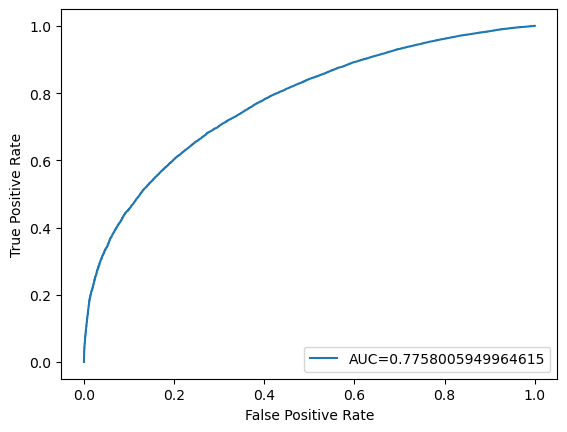

In [64]:
probabilities = logreg.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [61]:
probabilities = logreg.predict_proba(np.array(X_test))
predictions = probabilities[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.roc_auc_score(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/noarapoport/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: continuous format is not supported

In [36]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0
            
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=372))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

npr.seed(123)
for i in [0,1]:
    for j in [0,1]:
        print(name[i],label[j])
        
        x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(tflist[i], labeldf[label[j]], test_size=0.2, random_state=434)
        x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=434)
        model.fit_generator(generator=batch_generator(x_train, y_train, 15),
                            epochs=5, validation_data=(x_validation, y_validation),
                            steps_per_epoch=x_train.shape[0]/15)

business_name is_entertainment
Epoch 1/5


TypeError: '(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), slice(None, None, None))' is an invalid key

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=372))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

npr.seed(123)
for i in [0,1]:
    for j in [0,1]:
        print(name[i],label[j])
        
        x_train, x_test, y_train, y_test = train_test_split(tflist[i], labeldf[label[j]], test_size=0.25, random_state=434)
        history = model.fit(x_train, y_train,
                            epochs=100,
                            verbose=False,
                            validation_data=(x_test, y_test),
                            batch_size=50)

business_name is_entertainment
business_name is_traffic


KeyboardInterrupt: 

In [38]:
x_train.shape[0]/32

11250.0

In [17]:
npr.seed(123)
for i in [0,1]:
    for j in [0,1]:
        print(name[i],label[j])
        X_train, X_test, y_train, y_test = train_test_split(tflist[i], labeldf[label[j]], test_size=0.2, random_state=434)
        # create and fit the Naive Bayes model
        nb_model = MultinomialNB()
        #nb_model = GaussianNB()
        nb_model.fit(X_train, y_train)

        # make predictions on the test data
        y_pred = nb_model.predict(X_test)
        
        '''
        param_grid_nb = {
        'var_smoothing': np.logspace(0,-9, num=100)
        }
        nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
        nbModel_grid.fit(X_train, y_train)
        print(nbModel_grid.best_estimator_)
        y_pred = nbModel_grid.predict(X_test)
        '''

        # calculate accuracy
        #accuracy = (y_pred == y_test).sum() / len(y_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')

        print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")

        print(precision_score(y_test, y_pred), ": is the precision score")

        print(recall_score(y_test, y_pred), ": is the recall score")

        print(f1_score(y_test, y_pred), ": is the f1 score")

business_name is_entertainment
Accuracy: 0.92
[[76966   615]
 [ 6461  5958]] : is the confusion matrix
0.9064354176175262 : is the precision score
0.4797487720428376 : is the recall score
0.6274220724515585 : is the f1 score
business_name is_traffic
Accuracy: 0.87
[[ 2347 10119]
 [ 1425 76109]] : is the confusion matrix
0.8826483276893816 : is the precision score
0.9816209662857585 : is the recall score
0.92950745594216 : is the f1 score
content is_entertainment
Accuracy: 0.89
[[77378   203]
 [ 9976  2443]] : is the confusion matrix
0.9232804232804233 : is the precision score
0.1967147113294146 : is the recall score
0.32432791237968805 : is the f1 score
content is_traffic
Accuracy: 0.86
[[  333 12133]
 [  342 77192]] : is the confusion matrix
0.864170165127344 : is the precision score
0.9955890319085821 : is the recall score
0.9252362773359543 : is the f1 score


In [33]:
from sklearn.preprocessing import LabelEncoder 
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1

In [34]:

Encoder = LabelEncoder()
y_train_svm = Encoder.fit_transform(y_train)
y_test_svm = Encoder.fit_transform(y_test)
SVM = svm.SVC(C=1.0, kernel = 'linear', degree = 3, gamma = 'auto')
SVM.fit(X_train,y_train_svm)
predictions_SVM = SVM.predict(X_test)
print("Accuracy: ", accuracy_score(predictions_SVM, y_test_svm)*100)